# Introduction to Scikit Learn using a Decision Tree

There are many ways to build and apply data mining modules in Scikit learn. You will see lots of examples. Some are more efficient that others. This this how I build a basic data mining project (it may or may not be efficient). Scikit learn has great documentation via http://scikit-learn.org/stable/index.html. Below is a combination of Numpy, Scikit learn, Matplotlib and Pandas scripts. These 4 are the primary tools of the datamining in Python. 

# Import standard packages for Machine Learning

In [21]:
#Add packages
#These are my standard packages I load for almost every project
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#From Scikit Learn
from sklearn import preprocessing
from sklearn.model_selection  import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
#Notice I did not load my Datamining packages yet (ie decision tree). I will do that as I use them.

# Check current directory

In [22]:
%pwd

'/Users/mylesgartland/OneDrive - Rockhurst University/Courses/Predictive Models/Pred_Models_git/Week 1'

# Change Directory to where my project is located

In [24]:
cd /Users/mylesgartland/OneDrive - Rockhurst University/Courses/Predictive Models/Pred_Models_git/Week 1/

/Users/mylesgartland/OneDrive - Rockhurst University/Courses/Predictive Models/Pred_Models_git/Week 1


# Read in a CSV file. Print basic information on file

In [25]:
bank = pd.read_csv("data/bank_data.csv", sep=",")
#print type of object for target
print("Data type", bank.savings_acct.dtype)
#Dimensions of dataset
print("Shape of Data", bank.shape)
#Colum names
print("Colums Names", bank.columns)
#See top few rows of dataset
bank.head(10)

Data type object
Shape of Data (600, 12)
Colums Names Index(['id', 'age', 'income', 'children', 'gender', 'region', 'married', 'car',
       'savings_acct', 'current_acct', 'mortgage', 'pep'],
      dtype='object')


,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,48,17546.00,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,40,30085.10,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,51,16575.40,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,23,20375.40,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,57,50576.30,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO
5,ID12106,57,37869.60,2,FEMALE,TOWN,YES,NO,YES,YES,NO,YES
6,ID12107,22,8877.07,0,MALE,RURAL,NO,NO,NO,YES,NO,YES
7,ID12108,58,24946.60,0,MALE,TOWN,YES,YES,YES,YES,NO,NO
8,ID12109,37,25304.30,2,FEMALE,SUBURBAN,YES,YES,NO,NO,NO,NO
9,ID12110,54,24212.10,2,MALE,TOWN,YES,YES,YES,YES,NO,NO


# Identify Target Variable and Move to Target to Collumn 0 (optional)

In [26]:
# designate target variable name
targetName = 'savings_acct'
targetSeries = bank[targetName]
#remove target from current location and insert in collum 0
del bank[targetName]
bank.insert(0, targetName, targetSeries)
#reprint dataframe and see target is in position 0
bank.head(10)

,savings_acct,id,age,income,children,gender,region,married,car,current_acct,mortgage,pep
0,NO,ID12101,48,17546.00,1,FEMALE,INNER_CITY,NO,NO,NO,NO,YES
1,NO,ID12102,40,30085.10,3,MALE,TOWN,YES,YES,YES,YES,NO
2,YES,ID12103,51,16575.40,0,FEMALE,INNER_CITY,YES,YES,YES,NO,NO
3,NO,ID12104,23,20375.40,3,FEMALE,TOWN,YES,NO,YES,NO,NO
4,YES,ID12105,57,50576.30,0,FEMALE,RURAL,YES,NO,NO,NO,NO
5,YES,ID12106,57,37869.60,2,FEMALE,TOWN,YES,NO,YES,NO,YES
6,NO,ID12107,22,8877.07,0,MALE,RURAL,NO,NO,YES,NO,YES
7,YES,ID12108,58,24946.60,0,MALE,TOWN,YES,YES,YES,NO,NO
8,NO,ID12109,37,25304.30,2,FEMALE,SUBURBAN,YES,YES,NO,NO,NO
9,YES,ID12110,54,24212.10,2,MALE,TOWN,YES,YES,YES,NO,NO


# ID collum needs to be removed since I do not believe it has predictive power

In [24]:
#Note: axis=1 denotes that we are referring to a column, not a row
bank=bank.drop('id',axis=1)
bank.head(10)

,savings_acct,age,income,children,gender,region,married,car,current_acct,mortgage,pep
0,NO,48,17546.00,1,FEMALE,INNER_CITY,NO,NO,NO,NO,YES
1,NO,40,30085.10,3,MALE,TOWN,YES,YES,YES,YES,NO
2,YES,51,16575.40,0,FEMALE,INNER_CITY,YES,YES,YES,NO,NO
3,NO,23,20375.40,3,FEMALE,TOWN,YES,NO,YES,NO,NO
4,YES,57,50576.30,0,FEMALE,RURAL,YES,NO,NO,NO,NO
5,YES,57,37869.60,2,FEMALE,TOWN,YES,NO,YES,NO,YES
6,NO,22,8877.07,0,MALE,RURAL,NO,NO,YES,NO,YES
7,YES,58,24946.60,0,MALE,TOWN,YES,YES,YES,NO,NO
8,NO,37,25304.30,2,FEMALE,SUBURBAN,YES,YES,NO,NO,NO
9,YES,54,24212.10,2,MALE,TOWN,YES,YES,YES,NO,NO


# EDA on the Target

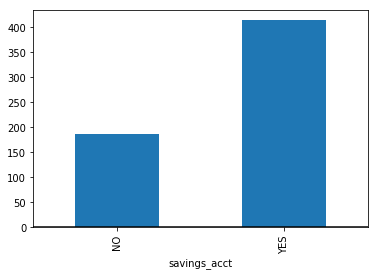

In [25]:
#Basic bar chart since the target is binominal
groupby = bank.groupby(targetName)
targetEDA=groupby[targetName].aggregate(len)
plt.figure()
targetEDA.plot(kind='bar', grid=False)
plt.axhline(0, color='k')

# Preprocessing of Data

Preprocessing
The below two steps are for preprocessing. The first cell changes the yes/no of the target to numeric. I needed to do this as some models require the target to be numeric. The second cell takes all the category features and creates dummies with them. This is stock code I have used for long time (and I did not write it). It is nice because it will take any dataframe of any size and handle categorial features. I do not have to change a single line in it. It can be used generically on bascially any dataframe. Saves a lot of time of coding each feature.

In [27]:
# This code turns a text target into numeric to some scikit learn alogrythms can process it
from sklearn import preprocessing
le_dep = preprocessing.LabelEncoder()
#to convert into numbers
bank['savings_acct'] = le_dep.fit_transform(bank['savings_acct'])

In [28]:
# perform data transformation. Creates dummies of any categorical feature
for col in bank.columns[1:]:
	attName = col
	dType = bank[col].dtype
	missing = pd.isnull(bank[col]).any()
	uniqueCount = len(bank[attName].value_counts(normalize=False))
	# discretize (create dummies)
	if dType == object:
		bank = pd.concat([bank, pd.get_dummies(bank[col], prefix=col)], axis=1)
		del bank[attName]

# Notice new shape and format of the dataframe. It is now ready to data mine

In [29]:
bank.shape

(600, 620)

In [11]:
bank.head(10)

,savings_acct,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES
0,0,48,17546.00,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1
1,0,40,30085.10,3,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,0
2,1,51,16575.40,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,1,0
3,0,23,20375.40,3,1,0,0,0,0,1,0,1,1,0,0,1,1,0,1,0
4,1,57,50576.30,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0
5,1,57,37869.60,2,1,0,0,0,0,1,0,1,1,0,0,1,1,0,0,1
6,0,22,8877.07,0,0,1,0,1,0,0,1,0,1,0,0,1,1,0,0,1
7,1,58,24946.60,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0
8,0,37,25304.30,2,1,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0
9,1,54,24212.10,2,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0


# Randomly split your dataset into Train/Test 

I split the data into a 60/40 train test. The features are stored in "features_train" and "features_test". The targets are in "target_train" and "target_test". I used a biggest test when I have an imbalanced set.

In [30]:
# split dataset into testing and training
features_train, features_test, target_train, target_test = train_test_split(
    bank.iloc[:,1:].values, bank.iloc[:,0].values, test_size=0.40, random_state=0)

## Note the four new train/test files and their shapes. 

In [31]:
print(features_test.shape)
print(features_train.shape)
print(target_test.shape)
print(target_train.shape)

(240, 619)
(360, 619)
(240,)
(360,)


# Run a Decision Tree Model via Scikit Learn using the above created train/test files

In [14]:
#Decision Tree train model. Call up my model and name it clf
from sklearn import tree 
clf_dt = tree.DecisionTreeClassifier()
#Call up the model to see the parameters you can tune (and their default setting)
print(clf_dt)
#Fit clf to the training data
clf_dt = clf_dt.fit(features_train, target_train)
#Predict clf DT model again test data
target_predicted_dt = clf_dt.predict(features_test)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


# Obtain Accuracy of Model

In [15]:
print("DT Accuracy Score", accuracy_score(target_test, target_predicted_dt))
print(classification_report(target_test, target_predicted_dt))
print(confusion_matrix(target_test, target_predicted_dt))


DT Accuracy Score 0.608333333333
             precision    recall  f1-score   support

          0       0.45      0.33      0.38        87
          1       0.67      0.76      0.71       153

avg / total       0.59      0.61      0.59       240

[[ 29  58]
 [ 36 117]]


# Crossvalidate Tree

I cross validated with 10 repeats. You can see the OOB score for each repeat and the mean. Are the CV results stable? If not, the model might be overfitting. 

In [16]:
#verify DT with Cross Validation
scores = cross_val_score(clf_dt, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean()          

Cross Validation Score for each K [ 0.48648649  0.72222222  0.69444444  0.72222222  0.75        0.63888889
  0.72222222  0.75        0.66666667  0.74285714]


0.68960102960102954

# To make a tree, add these to packages

conda install graphviz

pip install pydotplus

In [19]:
from IPython.display import Image
dot_data = tree.export_graphviz(clf_dt, out_file=None, 
                         filled=True, rounded=True,  
                         special_characters=True)
#Add feature names

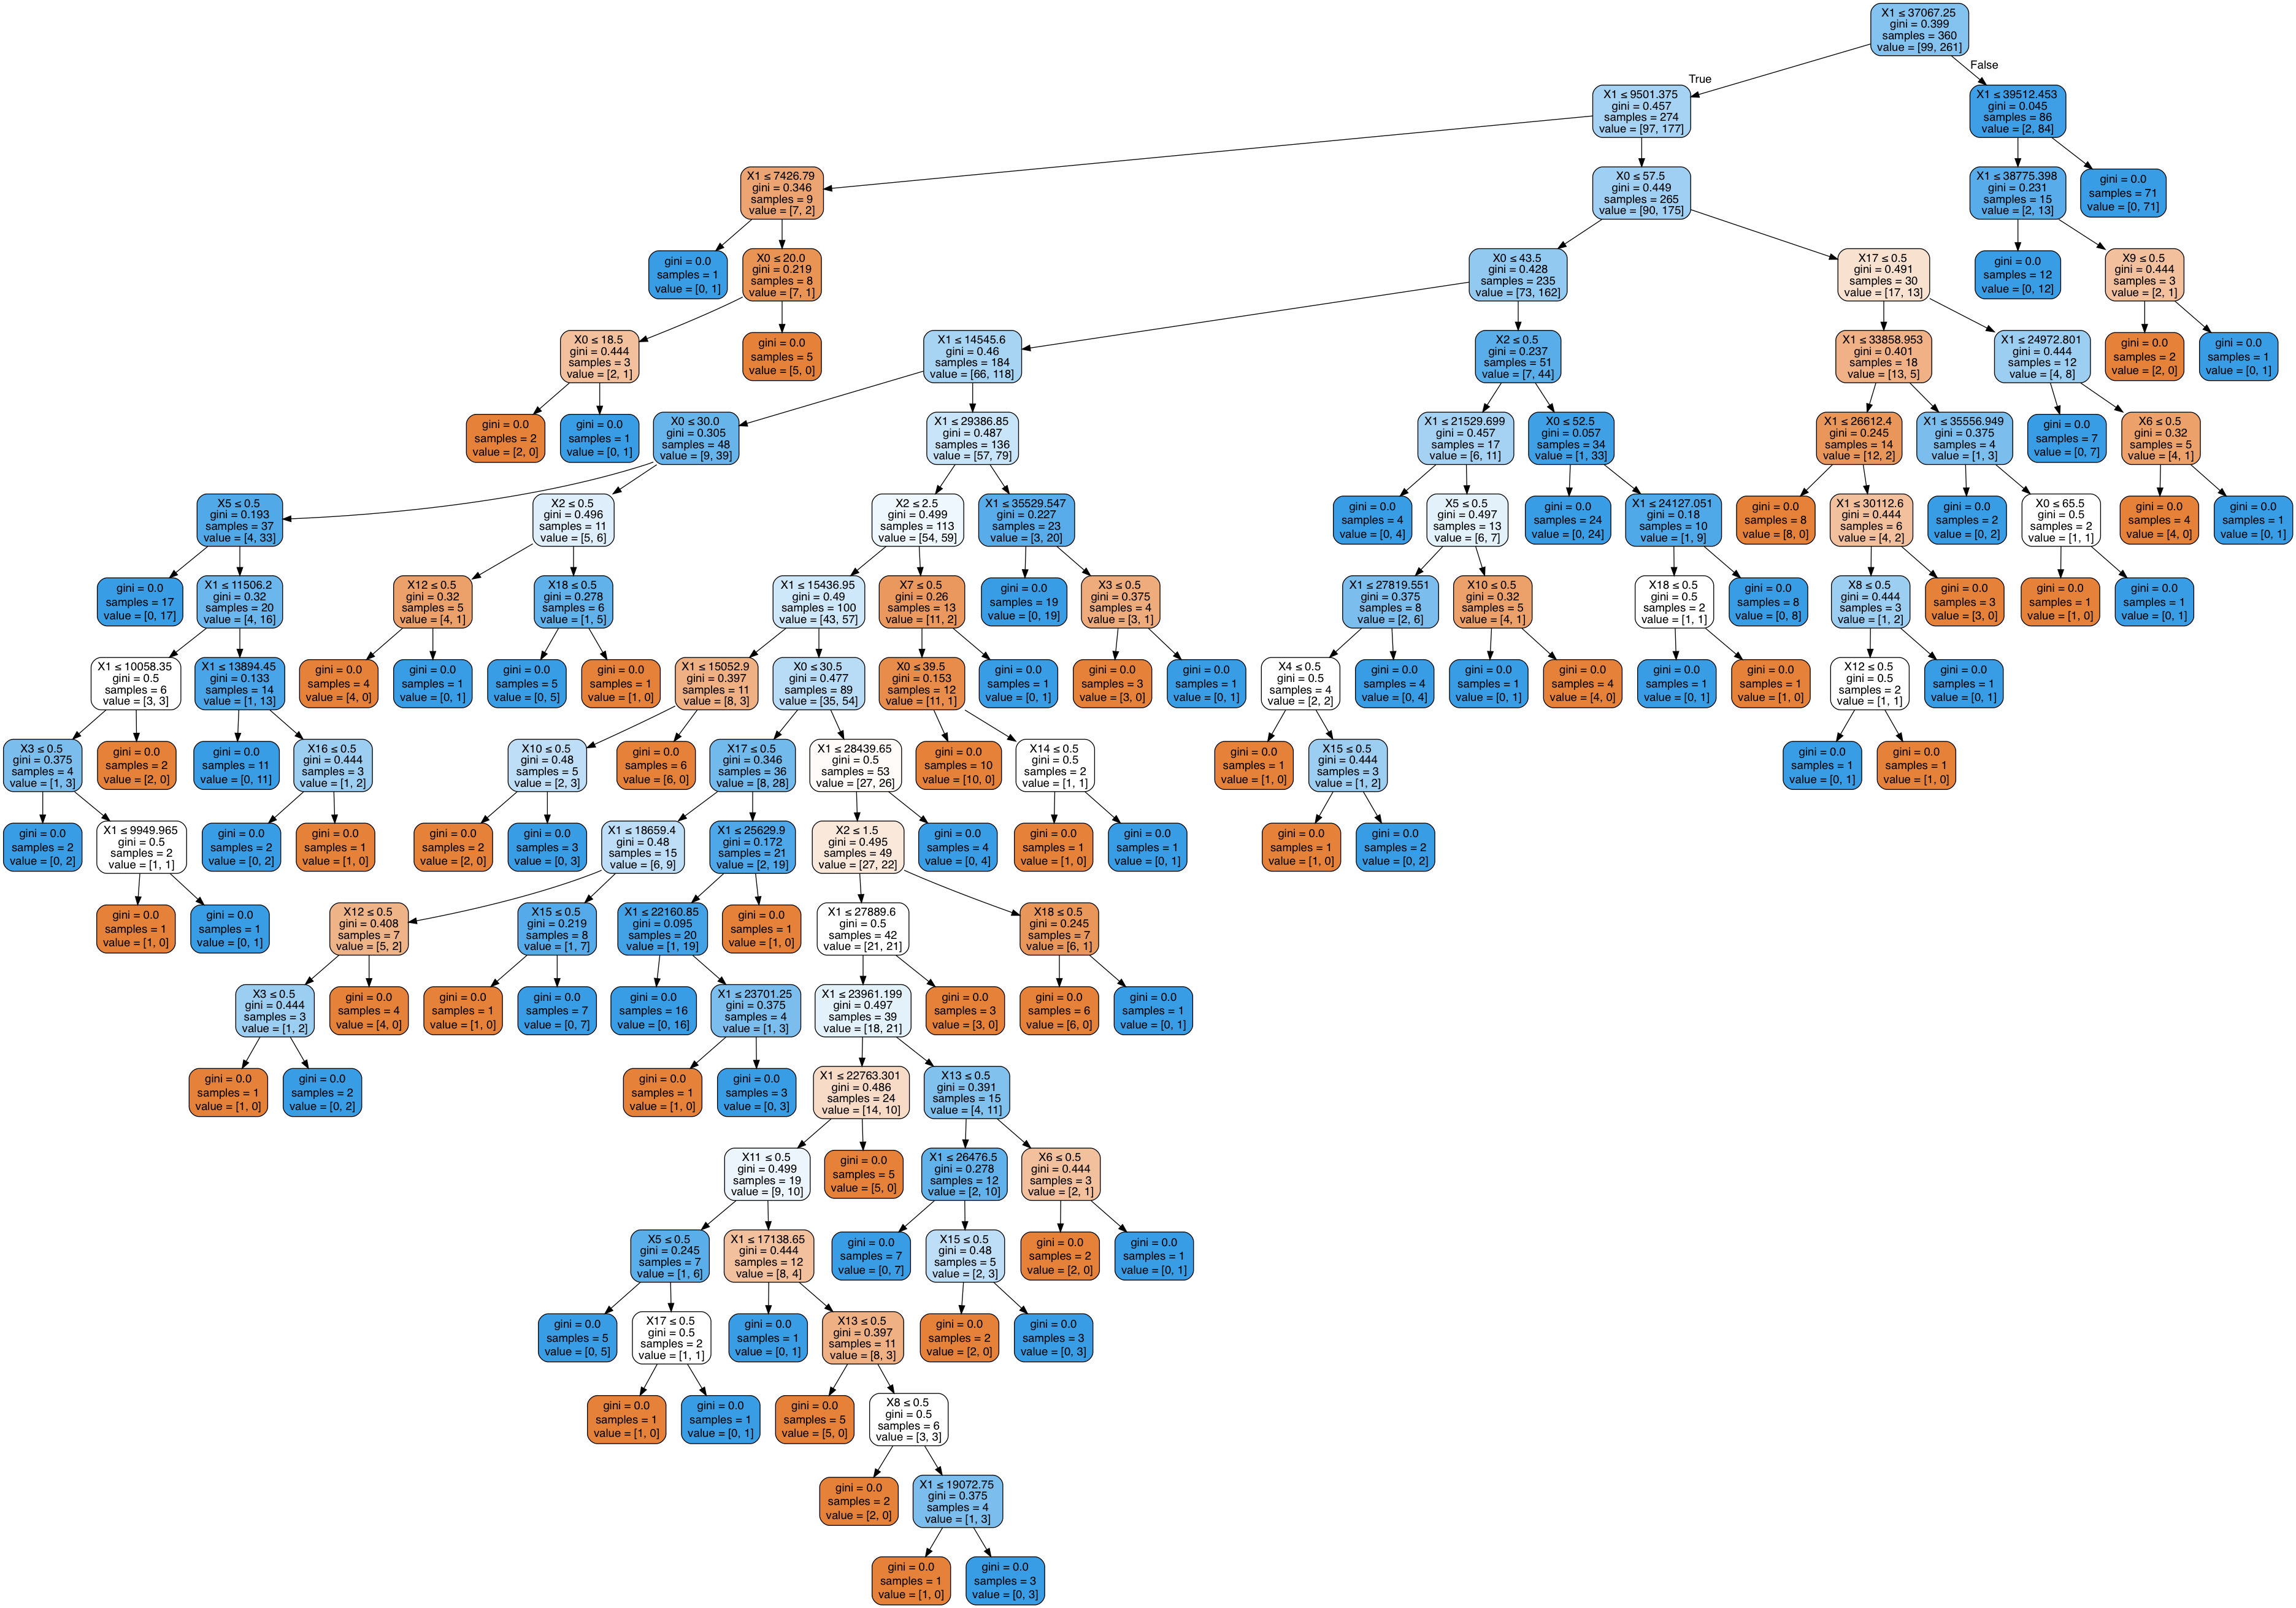

In [20]:
import pydotplus 
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png()) 

# Add your next model using what you have already processed, below

#Perhaps try a KNN on the same data
#http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
#Look at your DT model for structure and guidance. 


## Start with:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier